## THE BRIDGE (Data Science Bootcamp - Agosto 2020)
# PROYECTO GRUPO D
Análisis de datos asociados al COVID-19 del grupo de paises conformado por Portugal, Venezuela, Turquía, Reino Unido y España.
Fuente de datos (Data Set) "https://covid.ourworldindata.org/data/owid-covid-data.csv"

Team members:

José Luis Manjon presimanjon@yahoo.es git @JoseLuisManjon

Filipa Teles filipa.teles@icloud.com git @Filipate

Mónica Villasuso villasuso.monica@gmail.com git @MVillasuso

In [1]:
import pandas as pd 
import json 
import numpy as np
pd.plotting.register_matplotlib_converters()
import random

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium

# print the graphs in the notebook
%matplotlib inline

# set seaborn style to white
sns.set_style("white")



Importar los datos de la fuente de datos

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_general = pd.read_csv(url, sep=",")
covid_general

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35502,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35503,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35504,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35505,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Agrupar por países pertenecientes al grupo D  

Objectivo: obtener la media de muertes totales

In [3]:
paises_grupoD=["PRT", "VEN", "TUR", "GBR", "ESP"]
covid_grupoD=covid_general[covid_general.iso_code.isin(paises_grupoD)]
covid_grupoD


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
25816,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
25817,PRT,Europe,Portugal,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
25818,PRT,Europe,Portugal,2020-03-03,2.0,2.0,0.0,0.0,0.196,0.196,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
25819,PRT,Europe,Portugal,2020-03-04,4.0,2.0,0.0,0.0,0.392,0.196,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
25820,PRT,Europe,Portugal,2020-03-05,5.0,1.0,0.0,0.0,0.490,0.098,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34484,VEN,South America,Venezuela,2020-08-04,20206.0,0.0,174.0,0.0,710.580,0.000,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
34485,VEN,South America,Venezuela,2020-08-05,21438.0,1232.0,187.0,13.0,753.905,43.325,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
34486,VEN,South America,Venezuela,2020-08-06,22299.0,861.0,195.0,8.0,784.184,30.279,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
34487,VEN,South America,Venezuela,2020-08-07,23280.0,981.0,202.0,7.0,818.682,34.499,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06


In [4]:
covid_grupoD.info()# ver el tipo Dtype de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 25816 to 34488
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         898 non-null    object 
 1   continent                        898 non-null    object 
 2   location                         898 non-null    object 
 3   date                             898 non-null    object 
 4   total_cases                      896 non-null    float64
 5   new_cases                        896 non-null    float64
 6   total_deaths                     896 non-null    float64
 7   new_deaths                       896 non-null    float64
 8   total_cases_per_million          896 non-null    float64
 9   new_cases_per_million            896 non-null    float64
 10  total_deaths_per_million         896 non-null    float64
 11  new_deaths_per_million           896 non-null    float64
 12  new_tests       

In [5]:
#Cambiar el formato de la columna "date" a datetime
#covid_grupoD["date"]=pd.to_datetime(covid_grupoD["date"],format="%Y-%m-%d")
#covid_grupoD

In [6]:
# Cambiar la columna "date" para tenerala como indice, para posteriormente hacer la media del total de muertes
covid_grupoD.set_index(["date"],inplace=True)

In [7]:
covid_grupoD

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,PRT,Europe,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
2020-03-02,PRT,Europe,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
2020-03-03,PRT,Europe,Portugal,2.0,2.0,0.0,0.0,0.196,0.196,0.000,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
2020-03-04,PRT,Europe,Portugal,4.0,2.0,0.0,0.0,0.392,0.196,0.000,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
2020-03-05,PRT,Europe,Portugal,5.0,1.0,0.0,0.0,0.490,0.098,0.000,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-04,VEN,South America,Venezuela,20206.0,0.0,174.0,0.0,710.580,0.000,6.119,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
2020-08-05,VEN,South America,Venezuela,21438.0,1232.0,187.0,13.0,753.905,43.325,6.576,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
2020-08-06,VEN,South America,Venezuela,22299.0,861.0,195.0,8.0,784.184,30.279,6.858,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06


In [8]:
# Saber cuantos NaN hay en el dataframe
covid_grupoD.isnull().sum().sum()


5231

In [9]:
# Eliminar todos los missing values para la colunma "Total_Deaths" para que estos no influyan en las operaciones posteriores
covid_no_NaN = covid_grupoD.dropna(subset=["total_deaths"])
covid_no_NaN

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2020-03-03,PRT,Europe,Portugal,2.0,2.0,0.0,0.0,0.196,0.196,0.000,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
2020-03-04,PRT,Europe,Portugal,4.0,2.0,0.0,0.0,0.392,0.196,0.000,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
2020-03-05,PRT,Europe,Portugal,5.0,1.0,0.0,0.0,0.490,0.098,0.000,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
2020-03-06,PRT,Europe,Portugal,9.0,4.0,0.0,0.0,0.883,0.392,0.000,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
2020-03-07,PRT,Europe,Portugal,13.0,4.0,0.0,0.0,1.275,0.392,0.000,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-04,VEN,South America,Venezuela,20206.0,0.0,174.0,0.0,710.580,0.000,6.119,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
2020-08-05,VEN,South America,Venezuela,21438.0,1232.0,187.0,13.0,753.905,43.325,6.576,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
2020-08-06,VEN,South America,Venezuela,22299.0,861.0,195.0,8.0,784.184,30.279,6.858,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06


In [10]:
#hacemos la media del total de muertes agrupando por fecha
final_covid_D = covid_no_NaN.groupby("date").mean().total_deaths
final_covid_D

date
2019-12-31        0.0
2020-01-01        0.0
2020-01-02        0.0
2020-01-03        0.0
2020-01-04        0.0
               ...   
2020-08-04    16473.4
2020-08-05    16497.8
2020-08-06    16516.6
2020-08-07    16531.8
2020-08-08    13569.5
Name: total_deaths, Length: 222, dtype: float64

In [11]:
final_covid_D.to_frame()

,total_deaths
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-08-04,16473.4
2020-08-05,16497.8
2020-08-06,16516.6


In [51]:
# renombrar la columna de "total muertes" 
final_covid_D.rename(columns={"total_deaths":"t_d_averages"},inplace=True)
final_covid_D

TypeError: rename() got an unexpected keyword argument 'columns'

In [13]:
#covid_no_NaN.loc[covid_no_NaN["iso_code"].isin(["PRT","ESP","VEN","GBR","TUR"])]



# ANALYSING GENERAL DATAFRAME

## Goal
What position do your countries occupe respect to the number of total infected and total deaths?



In [14]:
covid_general

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35502,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35503,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35504,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35505,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Get general information about dataframe. What is the Dtype of the values for each column 
covid_general.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35507 entries, 0 to 35506
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35443 non-null  object 
 1   continent                        35221 non-null  object 
 2   location                         35507 non-null  object 
 3   date                             35507 non-null  object 
 4   total_cases                      35162 non-null  float64
 5   new_cases                        35162 non-null  float64
 6   total_deaths                     35162 non-null  float64
 7   new_deaths                       35162 non-null  float64
 8   total_cases_per_million          35098 non-null  float64
 9   new_cases_per_million            35098 non-null  float64
 10  total_deaths_per_million         35098 non-null  float64
 11  new_deaths_per_million           35098 non-null  float64
 12  new_tests         

In [16]:
# show how many rows and columns
covid_general.shape 

(35507, 36)

In [17]:
#show how many NaN values in Dataframe
covid_general.isnull().sum() 

iso_code                              64
continent                            286
location                               0
date                                   0
total_cases                          345
new_cases                            345
total_deaths                         345
new_deaths                           345
total_cases_per_million              409
new_cases_per_million                409
total_deaths_per_million             409
new_deaths_per_million               409
new_tests                          24418
total_tests                        24071
total_tests_per_thousand           24071
new_tests_per_thousand             24418
new_tests_smoothed                 23039
new_tests_smoothed_per_thousand    23039
tests_per_case                     23881
positive_rate                      23537
tests_units                        22293
stringency_index                    6650
population                            64
population_density                  1617
median_age      

# Cleaning Unnecessary Information - Data Wrangling

In [69]:
#Get rid of columns we are not using in our analysis 
covid_general_ = covid_general.drop(columns=["location","continent","handwashing_facilities"])
covid_general_

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
0,AFG,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
1,AFG,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
2,AFG,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
3,AFG,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
4,AFG,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35502,NaN,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35503,NaN,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35504,NaN,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35505,NaN,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#Selecting just the columns needed for the especific analysis
covid_general_=covid_general_[["iso_code","date","new_cases","new_deaths"]]
covid_general_

,iso_code,date,new_cases,new_deaths
0,AFG,2019-12-31,0.0,0.0
1,AFG,2020-01-01,0.0,0.0
2,AFG,2020-01-02,0.0,0.0
3,AFG,2020-01-03,0.0,0.0
4,AFG,2020-01-04,0.0,0.0
...,...,...,...,...
35502,NaN,2020-02-28,0.0,0.0
35503,NaN,2020-02-29,0.0,2.0
35504,NaN,2020-03-01,0.0,0.0
35505,NaN,2020-03-02,0.0,0.0


Like seen above, there is a lot of NaN values in this dataframe and as we know, this can lead us to wrong information

In [97]:
#Replace the NaN values with zero (this should not interfere with the next operations)
covid_general_.replace(to_replace = np.nan, value = 0)  


,iso_code,date,new_cases,new_deaths
0,AFG,2019-12-31,0.0,0.0
1,AFG,2020-01-01,0.0,0.0
2,AFG,2020-01-02,0.0,0.0
3,AFG,2020-01-03,0.0,0.0
4,AFG,2020-01-04,0.0,0.0
...,...,...,...,...
35502,0,2020-02-28,0.0,0.0
35503,0,2020-02-29,0.0,2.0
35504,0,2020-03-01,0.0,0.0
35505,0,2020-03-02,0.0,0.0


In [98]:
#Changing dtype object to datetime for the column "date"
covid_general_["date"]=pd.to_datetime(covid_general_["date"],format="%Y-%m-%d")

In [99]:
covid_general_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35507 entries, 0 to 35506
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   iso_code    35443 non-null  object        
 1   date        35507 non-null  datetime64[ns]
 2   new_cases   35162 non-null  float64       
 3   new_deaths  35162 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ MB


## What position do your countries occupe respect to the number of total infected and total deaths?


In [129]:
covid_general_

,iso_code,date,new_cases,new_deaths
0,AFG,2019-12-31,0.0,0.0
1,AFG,2020-01-01,0.0,0.0
2,AFG,2020-01-02,0.0,0.0
3,AFG,2020-01-03,0.0,0.0
4,AFG,2020-01-04,0.0,0.0
...,...,...,...,...
35502,NaN,2020-02-28,0.0,0.0
35503,NaN,2020-02-29,0.0,2.0
35504,NaN,2020-03-01,0.0,0.0
35505,NaN,2020-03-02,0.0,0.0


In [25]:
covid_general_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35507 entries, 0 to 35506
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         35443 non-null  object        
 1   date                             35507 non-null  datetime64[ns]
 2   total_cases                      35162 non-null  float64       
 3   new_cases                        35162 non-null  float64       
 4   total_deaths                     35162 non-null  float64       
 5   new_deaths                       35162 non-null  float64       
 6   total_cases_per_million          35098 non-null  float64       
 7   new_cases_per_million            35098 non-null  float64       
 8   total_deaths_per_million         35098 non-null  float64       
 9   new_deaths_per_million           35098 non-null  float64       
 10  new_tests                        11089 non-null  float64  

In [130]:
#Group by country and sum all the new cases and all new deaths, to see all total infected and all the total deaths in each country
covid_new_cases=covid_general_.groupby(["iso_code"]).sum()
covid_new_cases

,new_cases,new_deaths
iso_code,,
ABW,396.0,3.0
AFG,37015.0,1307.0
AGO,1483.0,64.0
AIA,3.0,0.0
ALB,6151.0,189.0
...,...,...
VNM,789.0,10.0
YEM,1796.0,512.0
ZAF,545476.0,9909.0


In [87]:
#covid_new_cases['new_cases'].apply(tuple)

In [131]:
#Ordering by the column "new cases" and "new deaths" from the smallest to the largest
covid_new_cases = covid_new_cases.sort_values(['new_cases',"new_deaths"], ascending=True)
covid_new_cases

,new_cases,new_deaths
iso_code,,
HKG,0.0,0.0
AIA,3.0,0.0
VGB,9.0,1.0
VAT,12.0,0.0
BES,13.0,0.0
...,...,...
RUS,877135.0,14725.0
IND,2088611.0,42518.0
BRA,2962442.0,99572.0


In [133]:
#Give to dataframe a numerical column to check the position of each country
covid_new_cases['position'] = np.arange(1,len(covid_new_cases)+1)
covid_new_cases

,new_cases,new_deaths,position
iso_code,,,
HKG,0.0,0.0,1
AIA,3.0,0.0,2
VGB,9.0,1.0,3
VAT,12.0,0.0,4
BES,13.0,0.0,5
...,...,...,...
RUS,877135.0,14725.0,207
IND,2088611.0,42518.0,208
BRA,2962442.0,99572.0,209


In [124]:
#covid_new_cases.index = [x for x in range(1, len(covid_new_cases.values)+1)]
#covid_new_cases

In [145]:
covid_new_cases_=covid_new_cases[["new_cases","position"]]
covid_new_cases_

,new_cases,position
iso_code,,
HKG,0.0,1
AIA,3.0,2
VGB,9.0,3
VAT,12.0,4
BES,13.0,5
...,...,...
RUS,877135.0,207
IND,2088611.0,208
BRA,2962442.0,209


In [136]:
covid_new_deaths_=covid_new_cases[["new_deaths","position"]]
covid_new_deaths_

,new_deaths,position
iso_code,,
HKG,0.0,1
AIA,0.0,2
VGB,1.0,3
VAT,0.0,4
BES,0.0,5
...,...,...
RUS,14725.0,207
IND,42518.0,208
BRA,99572.0,209


In [146]:
#obtener las posiciones de los paises del grupo D, a través de la posición de la columna numerica
position_covid_new_cases_=covid_new_cases_.loc[["VEN","PRT","TUR","GBR","ESP"]]
position_covid_new_cases_

,new_cases,position
iso_code,,
VEN,24166.0,147
PRT,52351.0,166
TUR,238450.0,194
GBR,309005.0,199
ESP,314362.0,200


In [147]:
#obtener las posiciones de los paises del grupo D, a través de la posición de la columna numerica
position_covid_new_deaths_=covid_new_deaths_.loc[["VEN","PRT","TUR","GBR","ESP"]]
position_covid_new_deaths_

,new_deaths,position
iso_code,,
VEN,208.0,147
PRT,1746.0,166
TUR,5813.0,194
GBR,46511.0,199
ESP,28503.0,200


# Matriz de Correlación de todos los paíse del mundo:
## Correlacion entre variables: 
    - Esperanza media de vida y el total de muertes
    - Numero de camas en hospital con el numero total de muertes
    - Densidad populacional y el numero total de casos
    - Pobreza extrema y numero total de muertes
    - Pib per capita y numero total de muertes

In [155]:
covid_general

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35502,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35503,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35504,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35505,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
covid_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35507 entries, 0 to 35506
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35443 non-null  object 
 1   continent                        35221 non-null  object 
 2   location                         35507 non-null  object 
 3   date                             35507 non-null  object 
 4   total_cases                      35162 non-null  float64
 5   new_cases                        35162 non-null  float64
 6   total_deaths                     35162 non-null  float64
 7   new_deaths                       35162 non-null  float64
 8   total_cases_per_million          35098 non-null  float64
 9   new_cases_per_million            35098 non-null  float64
 10  total_deaths_per_million         35098 non-null  float64
 11  new_deaths_per_million           35098 non-null  float64
 12  new_tests         

In [159]:
covid_general_corr = covid_general.iloc[:,np.r_[0,4,6,13,19,20,21,23,25:36]] 

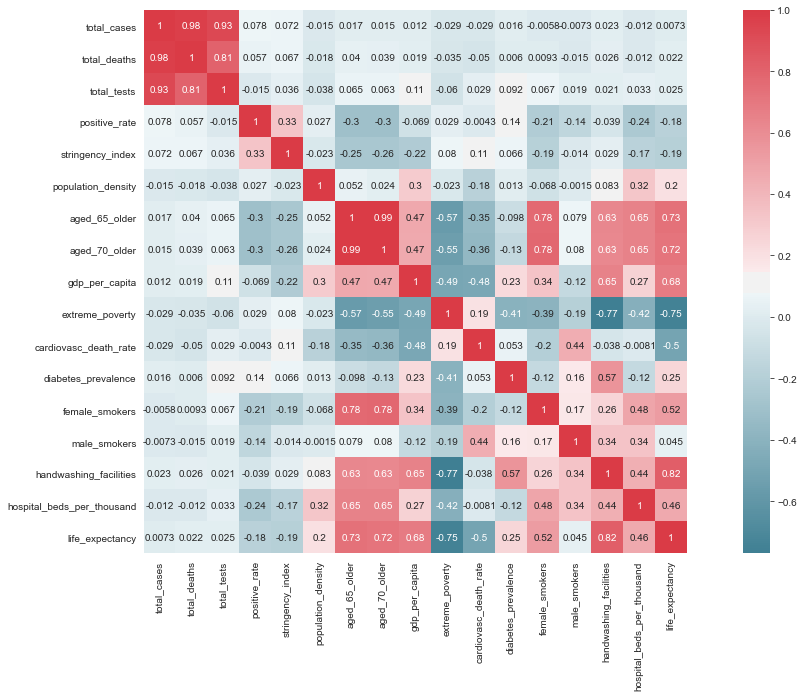

In [164]:
f, ax = plt.subplots(figsize=(20, 10)) 
corr = covid_general_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 


# Conclusiones

No se observan correlacion entre la esperanza media de vida y el total de muertes, una vez que según la tabla de correlaciones se puede observar un valor muy bajo.

De igual manera no se observa una correlación positiva entre el numero de camas en hospital con el numero total de muertes.

Se observa que la correlación entre la densidad populacional y el numero total de casos es igualmente bajo no teniendo correlación entre si.

La correlacion entre pobreza extrema y pib per capita con respecto al total de muertes es igualmente baja.
 


In [ ]:
# Are there outliers or some rare data?
See if there are some outliers for the columns: 
- total_cases, total_deaths
- new_cases, new_deaths
- total_cases_per_million, new_cases_per_million


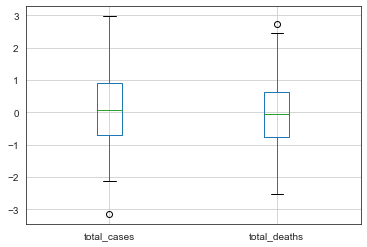

In [202]:


np.random.seed(None)
covid_general = pd.DataFrame(np.random.randn(100,2),
                  columns=['total_cases', 'total_deaths'])
boxplot = covid_general.boxplot(column=['total_cases', "total_deaths"])

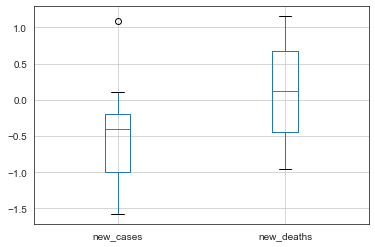

In [195]:
np.random.seed(None)
covid_general = pd.DataFrame(np.random.randn(10,2),
                  columns=["new_cases", "new_deaths"])
boxplot = covid_general.boxplot(column=['new_cases', "new_deaths"])

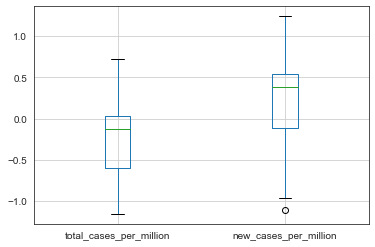

In [194]:
np.random.seed(None)
covid_general = pd.DataFrame(np.random.randn(10,2),
                  columns=["total_cases_per_million", "new_cases_per_million"])
boxplot = covid_general.boxplot(column=['total_cases_per_million', "new_cases_per_million"])

## Create with bars, lines, points and pie charts the daily deaths and infected. 

In [207]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_ = pd.read_csv(url, sep=",")
covid_

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35712,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35713,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35714,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35715,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
paises_grupo_D=["PRT", "VEN", "TUR", "GBR", "ESP"]
paises_nombres={"PRT":"Portugal", "VEN":"Venezuela", "TUR":"Turquía", "GBR":"Gran Bretaña", "ESP":"España"}
covid_grupo_D=covid_[covid_.iso_code.isin(paises_grupo_D)]
covid_grupo_D

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
25968,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
25969,PRT,Europe,Portugal,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
25970,PRT,Europe,Portugal,2020-03-03,2.0,2.0,0.0,0.0,0.196,0.196,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
25971,PRT,Europe,Portugal,2020-03-04,4.0,2.0,0.0,0.0,0.392,0.196,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
25972,PRT,Europe,Portugal,2020-03-05,5.0,1.0,0.0,0.0,0.490,0.098,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34688,VEN,South America,Venezuela,2020-08-05,21438.0,1232.0,187.0,13.0,753.905,43.325,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
34689,VEN,South America,Venezuela,2020-08-06,22299.0,861.0,195.0,8.0,784.184,30.279,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
34690,VEN,South America,Venezuela,2020-08-07,23280.0,981.0,202.0,7.0,818.682,34.499,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
34691,VEN,South America,Venezuela,2020-08-08,24166.0,886.0,208.0,6.0,849.840,31.158,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06


In [282]:
covid_grupo_D = covid_grupo_D.iloc[:,[0,1,2,3,4,5,6,7,8]]
covid_grupo_D  

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million
25968,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN
25969,PRT,Europe,Portugal,2020-03-02,NaN,NaN,NaN,NaN,NaN
25970,PRT,Europe,Portugal,2020-03-03,2.0,2.0,0.0,0.0,0.196
25971,PRT,Europe,Portugal,2020-03-04,4.0,2.0,0.0,0.0,0.392
25972,PRT,Europe,Portugal,2020-03-05,5.0,1.0,0.0,0.0,0.490
...,...,...,...,...,...,...,...,...,...
34688,VEN,South America,Venezuela,2020-08-05,21438.0,1232.0,187.0,13.0,753.905
34689,VEN,South America,Venezuela,2020-08-06,22299.0,861.0,195.0,8.0,784.184
34690,VEN,South America,Venezuela,2020-08-07,23280.0,981.0,202.0,7.0,818.682
34691,VEN,South America,Venezuela,2020-08-08,24166.0,886.0,208.0,6.0,849.840


In [283]:
covid_grupo_D["date"]=pd.to_datetime(covid_grupo_D["date"],format="%Y-%m-%d")

In [284]:
covid_grupo_D["new_date"] = covid_grupo_D.date.apply(lambda x: x.strftime("%d %b, %Y"))
covid_grupo_D.fillna(0, inplace=True)

In [285]:
covid_grupo_D[(covid_grupo_D['new_deaths']>0) & (covid_grupo_D.location =='Portugal')].head(2)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_date
25985,PRT,Europe,Portugal,2020-03-18,448.0,117.0,1.0,1.0,43.936,"18 Mar, 2020"
25986,PRT,Europe,Portugal,2020-03-19,642.0,194.0,2.0,1.0,62.962,"19 Mar, 2020"


In [306]:
daily_deaths = covid_grupo_D[covid_grupo_D['date']>'2020-03-15']
daily_deaths

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_date
25983,PRT,Europe,Portugal,2020-03-16,245.0,76.0,0.0,0.0,24.027,"16 Mar, 2020"
25984,PRT,Europe,Portugal,2020-03-17,331.0,86.0,0.0,0.0,32.461,"17 Mar, 2020"
25985,PRT,Europe,Portugal,2020-03-18,448.0,117.0,1.0,1.0,43.936,"18 Mar, 2020"
25986,PRT,Europe,Portugal,2020-03-19,642.0,194.0,2.0,1.0,62.962,"19 Mar, 2020"
25987,PRT,Europe,Portugal,2020-03-20,785.0,143.0,3.0,1.0,76.986,"20 Mar, 2020"
...,...,...,...,...,...,...,...,...,...,...
34688,VEN,South America,Venezuela,2020-08-05,21438.0,1232.0,187.0,13.0,753.905,"05 Aug, 2020"
34689,VEN,South America,Venezuela,2020-08-06,22299.0,861.0,195.0,8.0,784.184,"06 Aug, 2020"
34690,VEN,South America,Venezuela,2020-08-07,23280.0,981.0,202.0,7.0,818.682,"07 Aug, 2020"
34691,VEN,South America,Venezuela,2020-08-08,24166.0,886.0,208.0,6.0,849.840,"08 Aug, 2020"


In [312]:
daily_deaths = daily_deaths.groupby(["date","iso_code","location"])["date","iso_code","location","total_cases","new_cases","total_deaths","new_deaths"].sum().reset_index()
daily_deaths

,date,iso_code,location,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-16,ESP,Spain,11491.0,1706.0,288.0,152.0
1,2020-03-16,GBR,United Kingdom,2605.0,361.0,43.0,15.0
2,2020-03-16,PRT,Portugal,245.0,76.0,0.0,0.0
3,2020-03-16,TUR,Turkey,18.0,16.0,0.0,0.0
4,2020-03-16,VEN,Venezuela,15.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...
728,2020-08-08,VEN,Venezuela,24166.0,886.0,208.0,6.0
729,2020-08-09,GBR,United Kingdom,309763.0,758.0,46566.0,55.0
730,2020-08-09,PRT,Portugal,52537.0,186.0,1750.0,4.0
731,2020-08-09,TUR,Turkey,239622.0,1172.0,5829.0,16.0


In [293]:
daily_deaths.tail(10)

,date,iso_code,location,total_cases,new_cases,total_deaths,new_deaths
723,2020-08-07,VEN,Venezuela,23280.0,981.0,202.0,7.0
724,2020-08-08,ESP,Spain,314362.0,0.0,28503.0,0.0
725,2020-08-08,GBR,United Kingdom,309005.0,871.0,46511.0,98.0
726,2020-08-08,PRT,Portugal,52351.0,290.0,1746.0,3.0
727,2020-08-08,TUR,Turkey,238450.0,1185.0,5813.0,15.0
728,2020-08-08,VEN,Venezuela,24166.0,886.0,208.0,6.0
729,2020-08-09,GBR,United Kingdom,309763.0,758.0,46566.0,55.0
730,2020-08-09,PRT,Portugal,52537.0,186.0,1750.0,4.0
731,2020-08-09,TUR,Turkey,239622.0,1172.0,5829.0,16.0
732,2020-08-09,VEN,Venezuela,24166.0,0.0,208.0,0.0


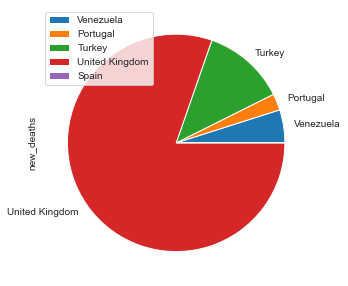

In [294]:
daily_deaths = pd.DataFrame({'new_deaths': [6.0,3.0, 15.0, 98.0, 0.0],
                   'date': [2020-8-8,2020-8-8,2020-8-8,2020-8-8,2020-8-8]},
                  index=["Venezuela","Portugal","Turkey","United Kingdom","Spain"])
plot = daily_deaths.plot.pie(y='new_deaths', figsize=(5, 5))

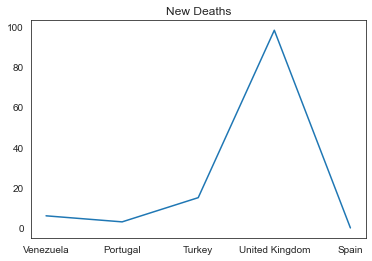

In [272]:
daily_deaths['new_deaths'].plot(title='New Deaths')

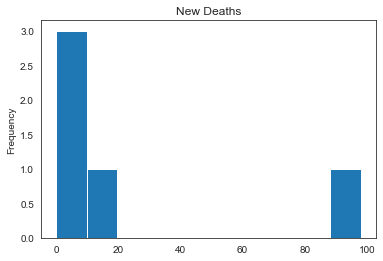

In [271]:
daily_deaths['new_deaths'].plot.hist(title='New Deaths')

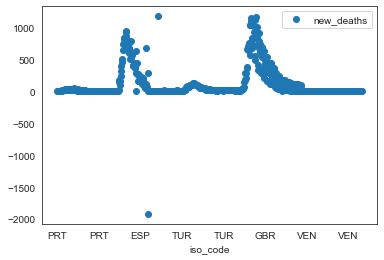

In [307]:
daily_deaths.plot(x='iso_code', y='new_deaths', style='o')

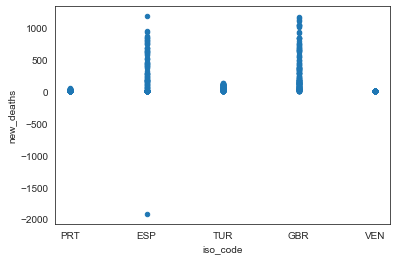

In [309]:
daily_deaths.plot.scatter(x='iso_code', y='new_deaths')

In [148]:
#obtener las posiciones de los paises del grupo D, a través de la posición de la columna numerica
#covid_new_cases_=covid_new_cases_.loc[covid_new_cases_['iso_code'].isin(["PRT","ESP","VEN","GBR","TUR"])]
#covid_new_cases_

In [103]:
#Group by country and sum all the new cases to see all total infected in each country
#covid_new_cases = covid_general_.groupby(["iso_code"]).sum().new_cases
#covid_new_cases.to_frame()
 

In [104]:
#Ordering by the column "new cases", from the smallest to the largest
#covid_new_cases=covid_new_cases.sort_values(['new_cases'], ascending=True) 
#covid_new_cases

In [137]:
#covid_new_cases_1.set_index = np.arange(1,len(covid_new_cases)+1)
#covid_new_cases_1

In [150]:
#repeticion del metodo anterior para confirmar el total de "new cases"
final_covid= covid_general_1.sort_values(by=['new_cases'], ascending=True).reset_index() 
final_covid

,iso_code,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,HKG,0.000000e+00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,...,111.738,6.166041e+05,0.0,0.000,91.63,0.000,0.00,0.00,0.00,933.46
1,AIA,3.980000e+02,3.0,0.0,0.0,26529.756,199.974,0.000,0.000,0.0,...,0.000,0.000000e+00,0.0,0.000,0.00,0.000,0.00,0.00,0.00,11053.80
2,VGB,9.160000e+02,9.0,111.0,1.0,30294.038,297.648,3670.992,33.072,0.0,...,0.000,0.000000e+00,0.0,0.000,1845.45,0.000,0.00,0.00,0.00,10674.45
3,VAT,1.474000e+03,12.0,0.0,0.0,1822002.446,14833.128,0.000,0.000,0.0,...,0.000,0.000000e+00,0.0,0.000,0.00,0.000,0.00,0.00,0.00,11042.64
4,BES,8.880000e+02,13.0,0.0,0.0,33866.000,495.784,0.000,0.000,0.0,...,0.000,0.000000e+00,0.0,0.000,0.00,0.000,0.00,0.00,0.00,10034.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,RUS,5.483105e+07,877135.0,776168.0,14725.0,375723.789,6010.468,5318.608,100.893,29320445.0,...,2085.246,5.498042e+06,22.2,95747.934,1371.96,5194.800,12942.60,0.00,1787.10,16112.76
207,IND,6.074136e+07,2088611.0,1531782.0,42518.0,44015.323,1513.480,1109.984,30.808,22653505.0,...,754.494,1.420295e+06,4685.2,62383.880,2296.19,419.900,4552.60,13160.55,117.13,15394.86
208,BRA,1.195373e+08,2962442.0,4972414.0,99572.0,562371.296,13937.005,23393.056,468.446,0.0,...,1123.320,3.130966e+06,754.8,39507.342,1800.42,2242.200,3973.80,0.00,488.40,16845.36
209,USA,2.754064e+08,4941796.0,12586359.0,161356.0,832036.708,14929.776,38024.947,487.475,59648537.0,...,2160.504,1.203805e+07,266.4,33541.758,2395.38,4240.200,5461.20,0.00,614.94,17506.92


In [41]:
#repeticion del metodo anterior para confirmar el total de "new cases"
final_covid.index = np.arange(1,len(final_covid)+1)
final_covid

,iso_code,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
1,HKG,0.000000e+00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,...,111.738,6.166041e+05,0.0,0.000,91.63,0.000,0.00,0.00,0.00,933.46
2,AIA,3.980000e+02,3.0,0.0,0.0,26529.756,199.974,0.000,0.000,0.0,...,0.000,0.000000e+00,0.0,0.000,0.00,0.000,0.00,0.00,0.00,11053.80
3,VGB,9.160000e+02,9.0,111.0,1.0,30294.038,297.648,3670.992,33.072,0.0,...,0.000,0.000000e+00,0.0,0.000,1845.45,0.000,0.00,0.00,0.00,10674.45
4,VAT,1.474000e+03,12.0,0.0,0.0,1822002.446,14833.128,0.000,0.000,0.0,...,0.000,0.000000e+00,0.0,0.000,0.00,0.000,0.00,0.00,0.00,11042.64
5,BES,8.880000e+02,13.0,0.0,0.0,33866.000,495.784,0.000,0.000,0.0,...,0.000,0.000000e+00,0.0,0.000,0.00,0.000,0.00,0.00,0.00,10034.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,RUS,5.483105e+07,877135.0,776168.0,14725.0,375723.789,6010.468,5318.608,100.893,29320445.0,...,2085.246,5.498042e+06,22.2,95747.934,1371.96,5194.800,12942.60,0.00,1787.10,16112.76
208,IND,6.074136e+07,2088611.0,1531782.0,42518.0,44015.323,1513.480,1109.984,30.808,22653505.0,...,754.494,1.420295e+06,4685.2,62383.880,2296.19,419.900,4552.60,13160.55,117.13,15394.86
209,BRA,1.195373e+08,2962442.0,4972414.0,99572.0,562371.296,13937.005,23393.056,468.446,0.0,...,1123.320,3.130966e+06,754.8,39507.342,1800.42,2242.200,3973.80,0.00,488.40,16845.36
210,USA,2.754064e+08,4941796.0,12586359.0,161356.0,832036.708,14929.776,38024.947,487.475,59648537.0,...,2160.504,1.203805e+07,266.4,33541.758,2395.38,4240.200,5461.20,0.00,614.94,17506.92


In [42]:
#final_covid.loc[final_covid['iso_code']=="ESP"]


In [43]:
total_infected=final_covid.loc[final_covid['iso_code'].isin(["PRT","ESP","VEN","GBR","TUR"])]
total_infected

,iso_code,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
147,VEN,628331.0,24166.0,5977.0,208.0,22096.374,849.848,210.214,7.318,0.0,...,571.590,2444773.212,0.0,29908.100,944.62,0.0,0.0,0.0,116.80,10520.76
166,PRT,4421872.0,52351.0,165864.0,1746.0,433656.860,5134.110,16266.423,171.221,1705474.0,...,2402.764,4497840.256,80.5,20582.562,1585.85,2624.3,4830.0,0.0,545.79,13210.05
194,TUR,20467283.0,238450.0,529087.0,5813.0,242678.558,2827.277,6273.337,68.928,4230602.0,...,749.028,3719142.468,29.6,25350.180,1795.24,2086.8,6082.8,0.0,415.88,11498.12
199,GBR,29722701.0,309005.0,4497666.0,46511.0,437832.530,4551.825,66253.209,685.135,9872288.0,...,2780.994,8825220.168,44.4,27114.414,950.16,4440.0,5483.4,0.0,563.88,18053.04
200,ESP,30860413.0,314362.0,3320770.0,28503.0,660048.255,6723.633,71025.247,609.629,0.0,...,3049.579,7574191.560,221.0,21968.063,1584.57,6055.4,6939.4,0.0,656.37,18466.76


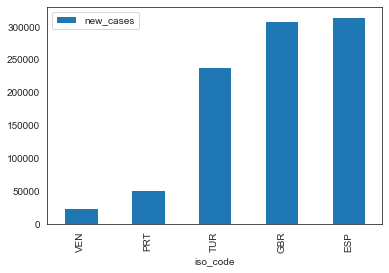

In [44]:
total_infected.plot(x ='iso_code', y='new_cases', kind = 'bar')

In [45]:
#filtrar por fecha para ver el total de muertes la fecha de 2020-08-06
total_deaths=covid_general.loc[covid_general['date'].isin(["2020-08-06"])]
total_deaths

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
209,AFG,Asia,Afghanistan,2020-08-06,36896.0,67.0,1298.0,4.0,947.793,1.721,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
362,ALB,Europe,Albania,2020-08-06,5889.0,139.0,182.0,6.0,2046.355,48.301,...,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57
579,DZA,Africa,Algeria,2020-08-06,33055.0,551.0,1261.0,13.0,753.802,12.565,...,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88
727,AND,Europe,Andorra,2020-08-06,939.0,0.0,52.0,0.0,12152.980,0.000,...,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73
867,AGO,Africa,Angola,2020-08-06,1344.0,180.0,59.0,5.0,40.893,5.477,...,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34813,ESH,Africa,Western Sahara,2020-08-06,766.0,0.0,1.0,0.0,1282.373,0.000,...,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.26
34934,YEM,Asia,Yemen,2020-08-06,1764.0,4.0,508.0,2.0,59.143,0.134,...,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12
35077,ZMB,Africa,Zambia,2020-08-06,7022.0,442.0,176.0,5.0,381.963,24.043,...,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89
35218,ZWE,Africa,Zimbabwe,2020-08-06,4339.0,118.0,84.0,3.0,291.934,7.939,...,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700,61.49


In [46]:
#ordenar el dataframe en orden crescente de muertes totales
total_deaths_=total_deaths.sort_values(by=['total_deaths'], ascending=True) 
total_deaths_

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28307,SYC,Africa,Seychelles,2020-08-06,126.0,0.0,0.0,0.0,1281.269,0.000,...,5.586,26382.287,1.1,242.648,10.55,7.100,35.700,NaN,3.600,73.40
13322,GRD,North America,Grenada,2020-08-06,24.0,0.0,0.0,0.0,213.297,0.000,...,5.021,13593.877,NaN,243.964,10.71,NaN,NaN,NaN,3.700,72.40
9286,DMA,North America,Dominica,2020-08-06,18.0,0.0,0.0,0.0,250.031,0.000,...,NaN,9673.367,NaN,227.376,11.62,NaN,NaN,NaN,3.800,75.00
32064,TLS,Asia,Timor,2020-08-06,25.0,0.0,0.0,0.0,18.962,0.000,...,1.897,6570.102,30.3,335.346,6.86,6.300,78.100,28.178,5.900,69.50
10890,FRO,Europe,Faeroe Islands,2020-08-06,241.0,14.0,0.0,0.0,4931.955,286.504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33541,GBR,Europe,United Kingdom,2020-08-06,307184.0,891.0,46364.0,65.0,4524.998,13.125,...,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
21192,MEX,North America,Mexico,2020-08-06,456100.0,6139.0,49698.0,829.0,3537.503,47.614,...,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05
4799,BRA,South America,Brazil,2020-08-06,2859073.0,57152.0,97256.0,1437.0,13450.701,268.875,...,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
33763,USA,North America,United States,2020-08-06,4823891.0,52804.0,158256.0,1450.0,14573.572,159.527,...,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86


In [47]:
total_deaths_.index = np.arange(1,len(total_deaths_)+1)
total_deaths_

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
1,SYC,Africa,Seychelles,2020-08-06,126.0,0.0,0.0,0.0,1281.269,0.000,...,5.586,26382.287,1.1,242.648,10.55,7.100,35.700,NaN,3.600,73.40
2,GRD,North America,Grenada,2020-08-06,24.0,0.0,0.0,0.0,213.297,0.000,...,5.021,13593.877,NaN,243.964,10.71,NaN,NaN,NaN,3.700,72.40
3,DMA,North America,Dominica,2020-08-06,18.0,0.0,0.0,0.0,250.031,0.000,...,NaN,9673.367,NaN,227.376,11.62,NaN,NaN,NaN,3.800,75.00
4,TLS,Asia,Timor,2020-08-06,25.0,0.0,0.0,0.0,18.962,0.000,...,1.897,6570.102,30.3,335.346,6.86,6.300,78.100,28.178,5.900,69.50
5,FRO,Europe,Faeroe Islands,2020-08-06,241.0,14.0,0.0,0.0,4931.955,286.504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,GBR,Europe,United Kingdom,2020-08-06,307184.0,891.0,46364.0,65.0,4524.998,13.125,...,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
207,MEX,North America,Mexico,2020-08-06,456100.0,6139.0,49698.0,829.0,3537.503,47.614,...,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05
208,BRA,South America,Brazil,2020-08-06,2859073.0,57152.0,97256.0,1437.0,13450.701,268.875,...,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
209,USA,North America,United States,2020-08-06,4823891.0,52804.0,158256.0,1450.0,14573.572,159.527,...,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86


In [48]:
#filtrar por os paises del grupo D
total_deaths_1=total_deaths_.loc[total_deaths_['iso_code'].isin(["PRT","ESP","VEN","GBR","TUR"])]
total_deaths_1

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
129,VEN,South America,Venezuela,2020-08-06,22299.0,861.0,195.0,8.0,784.184,30.279,...,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06
173,PRT,Europe,Portugal,2020-08-06,51848.0,167.0,1740.0,1.0,5084.779,16.378,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
189,TUR,Asia,Turkey,2020-08-06,236112.0,1178.0,5784.0,19.0,2799.557,13.967,...,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69
202,ESP,Europe,Spain,2020-08-06,309855.0,4088.0,28500.0,1.0,6627.236,87.435,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
206,GBR,Europe,United Kingdom,2020-08-06,307184.0,891.0,46364.0,65.0,4524.998,13.125,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32


In [49]:
#total_deaths_1=total_deaths_.set_index("iso_code")
#total_deaths_1

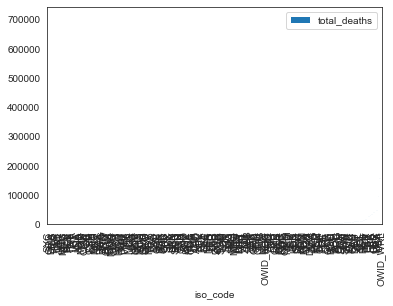

In [50]:
total_deaths_.plot(x ='iso_code', y='total_deaths', kind = 'bar')
 


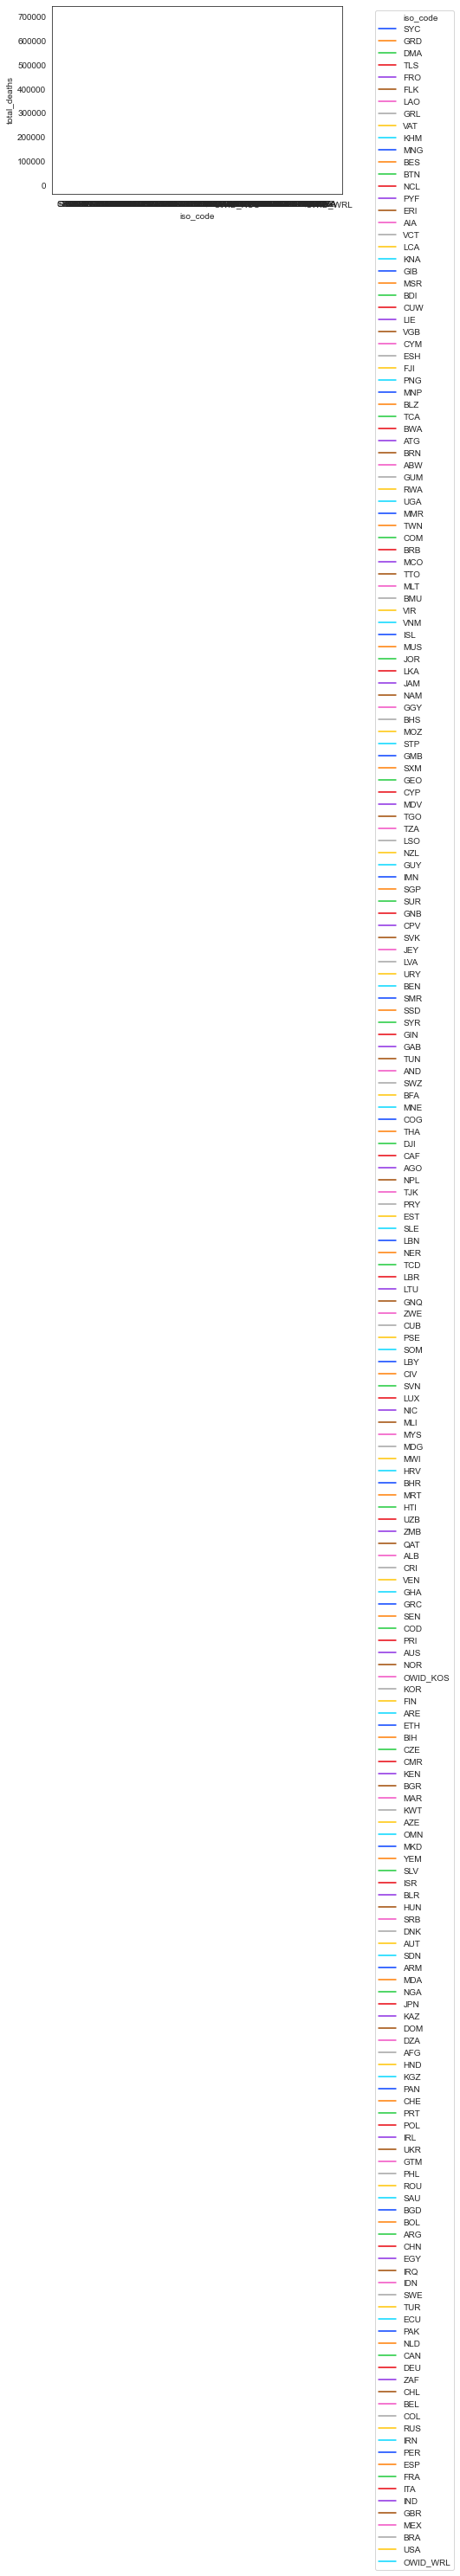

In [52]:
lp = sns.lineplot('iso_code','total_deaths', ci=None, hue='iso_code', palette="bright",data=total_deaths_)
lp.legend(loc='upper right', bbox_to_anchor=(1.4,1))